In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os
import math

We are analyzing data from March 2020 to February 2021
The idea is to analyze / predict only daily numbers - Daily Confirmed, Daily Recovered, Daily Deceased and Daily Tested

In [2]:
# Load Data
data = pd.read_csv('../Data/covid19indiaorg/states_2021.csv')

In [3]:
data.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [4]:
data.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
12540,2021-02-26,Tripura,33404,32961,388,23,620416.0
12541,2021-02-26,India,11063557,10749123,156867,4569,214661465.0
12542,2021-02-26,Uttar Pradesh,603232,592327,8723,0,30930489.0
12543,2021-02-26,Uttarakhand,96837,93400,1690,1396,2359483.0
12544,2021-02-26,West Bengal,574500,560887,10260,0,8503417.0


In [5]:
# Create dataframe for India
data_ind = data[data['State'] == 'India']
data_ind.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
11,2020-03-02,India,5,3,0,0,NaN


In [6]:
data_ind.shape

(366, 7)

In [7]:
data_ind.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
12393,2021-02-22,India,11015864,10710487,156498,4554,212230431.0
12430,2021-02-23,India,11029546,10724456,156601,4559,213036275.0
12467,2021-02-24,India,11046476,10736556,156742,4567,213829658.0
12504,2021-02-25,India,11063075,10748778,156861,4569,214661465.0
12541,2021-02-26,India,11063557,10749123,156867,4569,214661465.0


In [8]:
data_ind = data_ind.reset_index()

In [9]:
data_ind.head()

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,1,2020-01-30,India,1,0,0,0,NaN
1,3,2020-02-02,India,2,0,0,0,NaN
2,5,2020-02-03,India,3,0,0,0,NaN
3,7,2020-02-14,India,3,3,0,0,NaN
4,11,2020-03-02,India,5,3,0,0,NaN


In [10]:
data_ind.tail()

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
361,12393,2021-02-22,India,11015864,10710487,156498,4554,212230431.0
362,12430,2021-02-23,India,11029546,10724456,156601,4559,213036275.0
363,12467,2021-02-24,India,11046476,10736556,156742,4567,213829658.0
364,12504,2021-02-25,India,11063075,10748778,156861,4569,214661465.0
365,12541,2021-02-26,India,11063557,10749123,156867,4569,214661465.0


In [11]:
data_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      366 non-null    int64  
 1   Date       366 non-null    object 
 2   State      366 non-null    object 
 3   Confirmed  366 non-null    int64  
 4   Recovered  366 non-null    int64  
 5   Deceased   366 non-null    int64  
 6   Other      366 non-null    int64  
 7   Tested     351 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 23.0+ KB


In [12]:
data_ind.isnull().sum()

index         0
Date          0
State         0
Confirmed     0
Recovered     0
Deceased      0
Other         0
Tested       15
dtype: int64

In [13]:
data_ind.head(20)

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,1,2020-01-30,India,1,0,0,0,NaN
1,3,2020-02-02,India,2,0,0,0,NaN
2,5,2020-02-03,India,3,0,0,0,NaN
3,7,2020-02-14,India,3,3,0,0,NaN
4,11,2020-03-02,India,5,3,0,0,NaN
5,16,2020-03-03,India,6,3,0,0,NaN
6,22,2020-03-04,India,28,3,0,0,NaN
7,29,2020-03-05,India,30,3,0,0,NaN
8,36,2020-03-06,India,31,3,0,0,NaN
9,45,2020-03-07,India,34,3,0,0,NaN


In [14]:
# Fill Null Values in Tested with '0'
data_ind['Tested'] = data_ind['Tested'].fillna(0)
data_ind.head(20)

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,1,2020-01-30,India,1,0,0,0,0.0
1,3,2020-02-02,India,2,0,0,0,0.0
2,5,2020-02-03,India,3,0,0,0,0.0
3,7,2020-02-14,India,3,3,0,0,0.0
4,11,2020-03-02,India,5,3,0,0,0.0
5,16,2020-03-03,India,6,3,0,0,0.0
6,22,2020-03-04,India,28,3,0,0,0.0
7,29,2020-03-05,India,30,3,0,0,0.0
8,36,2020-03-06,India,31,3,0,0,0.0
9,45,2020-03-07,India,34,3,0,0,0.0


In [15]:
data_ind.isnull().sum()

index        0
Date         0
State        0
Confirmed    0
Recovered    0
Deceased     0
Other        0
Tested       0
dtype: int64

In [16]:
# Try and convert the Tested column to int64
data_ind['Tested'] = data_ind['Tested'].astype('int64')
data_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      366 non-null    int64 
 1   Date       366 non-null    object
 2   State      366 non-null    object
 3   Confirmed  366 non-null    int64 
 4   Recovered  366 non-null    int64 
 5   Deceased   366 non-null    int64 
 6   Other      366 non-null    int64 
 7   Tested     366 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 23.0+ KB


In [17]:
data_ind.head(20)

,index,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,1,2020-01-30,India,1,0,0,0,0
1,3,2020-02-02,India,2,0,0,0,0
2,5,2020-02-03,India,3,0,0,0,0
3,7,2020-02-14,India,3,3,0,0,0
4,11,2020-03-02,India,5,3,0,0,0
5,16,2020-03-03,India,6,3,0,0,0
6,22,2020-03-04,India,28,3,0,0,0
7,29,2020-03-05,India,30,3,0,0,0
8,36,2020-03-06,India,31,3,0,0,0
9,45,2020-03-07,India,34,3,0,0,0


In [18]:
# We do not need the 'index' column
data_ind = data_ind.drop(columns=['index'], axis = 1)

In [19]:
data_ind.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,India,1,0,0,0,0
1,2020-02-02,India,2,0,0,0,0
2,2020-02-03,India,3,0,0,0,0
3,2020-02-14,India,3,3,0,0,0
4,2020-03-02,India,5,3,0,0,0


In [20]:
# Rename the columns
data_ind.columns = ['Date', 'Region', 'TotalConfirmed', 'TotalRecovered', 'TotalDeceased', 'Other', 'TotalTested']
data_ind.head()

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,Other,TotalTested
0,2020-01-30,India,1,0,0,0,0
1,2020-02-02,India,2,0,0,0,0
2,2020-02-03,India,3,0,0,0,0
3,2020-02-14,India,3,3,0,0,0
4,2020-03-02,India,5,3,0,0,0


**Feature 1: Create new column for Active Cases**

Active = TotalConfirmed - (TotalRecovered + Other + TotalDeceased)

In [21]:
data_ind['Active'] = data_ind['TotalConfirmed'] - (data_ind['TotalRecovered'] + data_ind['Other'] 
                                                   + data_ind['TotalDeceased'])
data_ind.head()

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,Other,TotalTested,Active
0,2020-01-30,India,1,0,0,0,0,1
1,2020-02-02,India,2,0,0,0,0,2
2,2020-02-03,India,3,0,0,0,0,3
3,2020-02-14,India,3,3,0,0,0,0
4,2020-03-02,India,5,3,0,0,0,2


In [22]:
# Delete the 'other' column
data_ind = data_ind.drop(['Other'], axis = 1)

In [23]:
data_ind.head()

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,TotalTested,Active
0,2020-01-30,India,1,0,0,0,1
1,2020-02-02,India,2,0,0,0,2
2,2020-02-03,India,3,0,0,0,3
3,2020-02-14,India,3,3,0,0,0
4,2020-03-02,India,5,3,0,0,2


**Feature 2: Create new columns for Daily Confirmed, Daily Recovered and Daily Deceased**

Initialize these columns to 0

In [24]:
data_ind['DailyConfirmed'] = 0
data_ind['DailyRecovered'] = 0
data_ind['DailyDeceased'] = 0

Compute values for DailyConfirmed (Subtract TotalConfirmed value of a row from the value of the previous row)

In [25]:
data_ind['DailyConfirmed'] = data_ind['TotalConfirmed'] - data_ind['TotalConfirmed'].shift(1)
data_ind['DailyConfirmed']

0          NaN
1          1.0
2          1.0
3          0.0
4          2.0
        ...   
361    10494.0
362    13682.0
363    16930.0
364    16599.0
365      482.0
Name: DailyConfirmed, Length: 366, dtype: float64

Compute values for DailyRecovered (Subtract TotalRecovered value of a row from value of the previous row)

In [26]:
data_ind['DailyRecovered'] = data_ind['TotalRecovered'] - data_ind['TotalRecovered'].shift(1)
data_ind['DailyRecovered']

0          NaN
1          0.0
2          0.0
3          3.0
4          0.0
        ...   
361    13233.0
362    13969.0
363    12100.0
364    12222.0
365      345.0
Name: DailyRecovered, Length: 366, dtype: float64

Compute values for DailyDeceased (Subtract TotalDeceased value of a row from value of the previous row)

In [27]:
data_ind['DailyDeceased'] = data_ind['TotalDeceased'] - data_ind['TotalDeceased'].shift(1)
data_ind['DailyDeceased']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
361     76.0
362    103.0
363    141.0
364    119.0
365      6.0
Name: DailyDeceased, Length: 366, dtype: float64

In [28]:
data_ind.head()

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,TotalTested,Active,DailyConfirmed,DailyRecovered,DailyDeceased
0,2020-01-30,India,1,0,0,0,1,NaN,NaN,NaN
1,2020-02-02,India,2,0,0,0,2,1.0,0.0,0.0
2,2020-02-03,India,3,0,0,0,3,1.0,0.0,0.0
3,2020-02-14,India,3,3,0,0,0,0.0,3.0,0.0
4,2020-03-02,India,5,3,0,0,2,2.0,0.0,0.0


In [29]:
# Fill Null Values with 0
data_ind['DailyConfirmed'] = data_ind['DailyConfirmed'].fillna(0)
data_ind['DailyRecovered'] = data_ind['DailyRecovered'].fillna(0)
data_ind['DailyDeceased'] = data_ind['DailyDeceased'].fillna(0)

In [30]:
data_ind.head()

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,TotalTested,Active,DailyConfirmed,DailyRecovered,DailyDeceased
0,2020-01-30,India,1,0,0,0,1,0.0,0.0,0.0
1,2020-02-02,India,2,0,0,0,2,1.0,0.0,0.0
2,2020-02-03,India,3,0,0,0,3,1.0,0.0,0.0
3,2020-02-14,India,3,3,0,0,0,0.0,3.0,0.0
4,2020-03-02,India,5,3,0,0,2,2.0,0.0,0.0


**Feature 3: Create column to store Daily Tests**

In [31]:
data_ind['DailyTested'] = data_ind['TotalTested'] - data_ind['TotalTested'].shift(1)
data_ind.head(20)

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,TotalTested,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested
0,2020-01-30,India,1,0,0,0,1,0.0,0.0,0.0,NaN
1,2020-02-02,India,2,0,0,0,2,1.0,0.0,0.0,0.0
2,2020-02-03,India,3,0,0,0,3,1.0,0.0,0.0,0.0
3,2020-02-14,India,3,3,0,0,0,0.0,3.0,0.0,0.0
4,2020-03-02,India,5,3,0,0,2,2.0,0.0,0.0,0.0
5,2020-03-03,India,6,3,0,0,3,1.0,0.0,0.0,0.0
6,2020-03-04,India,28,3,0,0,25,22.0,0.0,0.0,0.0
7,2020-03-05,India,30,3,0,0,27,2.0,0.0,0.0,0.0
8,2020-03-06,India,31,3,0,0,28,1.0,0.0,0.0,0.0
9,2020-03-07,India,34,3,0,0,31,3.0,0.0,0.0,0.0


In [32]:
data_ind['DailyTested'] = data_ind['DailyTested'].fillna(0)
data_ind.head()

,Date,Region,TotalConfirmed,TotalRecovered,TotalDeceased,TotalTested,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested
0,2020-01-30,India,1,0,0,0,1,0.0,0.0,0.0,0.0
1,2020-02-02,India,2,0,0,0,2,1.0,0.0,0.0,0.0
2,2020-02-03,India,3,0,0,0,3,1.0,0.0,0.0,0.0
3,2020-02-14,India,3,3,0,0,0,0.0,3.0,0.0,0.0
4,2020-03-02,India,5,3,0,0,2,2.0,0.0,0.0,0.0


In [33]:
# Create a dataframe to only hold 'Daily' values
d_columns = ['Date', 'Region', 'Active', 'DailyConfirmed', 'DailyRecovered', 'DailyDeceased', 'DailyTested']
ind_daily = data_ind[d_columns]
ind_daily.head()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested
0,2020-01-30,India,1,0.0,0.0,0.0,0.0
1,2020-02-02,India,2,1.0,0.0,0.0,0.0
2,2020-02-03,India,3,1.0,0.0,0.0,0.0
3,2020-02-14,India,0,0.0,3.0,0.0,0.0
4,2020-03-02,India,2,2.0,0.0,0.0,0.0


**Feature 4: Create column to store Daily Recovery Rate**

In [34]:
def calculate_drr(cols):
    d_conf = cols[0]
    d_reco = cols[1]
    
    if d_conf and d_reco > 0:
        return np.round(((d_reco / d_conf) * 100 ), 2)
    else:
        return 0.0

In [35]:
ind_daily['DRR'] = ind_daily[['DailyConfirmed', 'DailyRecovered']].apply(calculate_drr, axis = 1)
ind_daily.head()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested,DRR
0,2020-01-30,India,1,0.0,0.0,0.0,0.0,0.0
1,2020-02-02,India,2,1.0,0.0,0.0,0.0,0.0
2,2020-02-03,India,3,1.0,0.0,0.0,0.0,0.0
3,2020-02-14,India,0,0.0,3.0,0.0,0.0,0.0
4,2020-03-02,India,2,2.0,0.0,0.0,0.0,0.0


In [36]:
ind_daily['DRR']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
361    126.10
362    102.10
363     71.47
364     73.63
365     71.58
Name: DRR, Length: 366, dtype: float64

**Feature 5: Create a new column to store daily positivity rate**

In [37]:
def calculate_dpr(cols):
    d_conf = cols[0]
    d_tests = cols[1]
    
    if d_conf and d_tests > 0:
        return np.round(((d_conf / d_tests) * 100), 2)
    else:
        return 0.0

In [38]:
ind_daily['DPR'] = ind_daily[['DailyConfirmed', 'DailyTested']].apply(calculate_dpr, axis = 1)
ind_daily['DPR']

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
361    1.55
362    1.70
363    2.13
364    2.00
365    0.00
Name: DPR, Length: 366, dtype: float64

**Feature 6: Create column to store daily case fatality rate**

In [39]:
def calculate_dfr(cols):
    d_dece = cols[0]
    d_conf = cols[1]
    
    if d_dece and d_conf > 0:
        return np.round(((d_dece / d_conf) * 100), 2)

In [40]:
ind_daily['DFR'] = ind_daily[['DailyDeceased', 'DailyConfirmed']].apply(calculate_dfr, axis = 1)
ind_daily['DFR']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
361    0.72
362    0.75
363    0.83
364    0.72
365    1.24
Name: DFR, Length: 366, dtype: float64

In [41]:
# Drop the last row of dataframe
ind_daily = ind_daily[:-1]
ind_daily.tail()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested,DRR,DPR,DFR
360,2021-02-21,India,147148,14278.0,9715.0,83.0,620216.0,68.04,2.30,0.58
361,2021-02-22,India,144325,10494.0,13233.0,76.0,678685.0,126.10,1.55,0.72
362,2021-02-23,India,143930,13682.0,13969.0,103.0,805844.0,102.10,1.70,0.75
363,2021-02-24,India,148611,16930.0,12100.0,141.0,793383.0,71.47,2.13,0.83
364,2021-02-25,India,152867,16599.0,12222.0,119.0,831807.0,73.63,2.00,0.72


In [42]:
ind_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            365 non-null    object 
 1   Region          365 non-null    object 
 2   Active          365 non-null    int64  
 3   DailyConfirmed  365 non-null    float64
 4   DailyRecovered  365 non-null    float64
 5   DailyDeceased   365 non-null    float64
 6   DailyTested     365 non-null    float64
 7   DRR             365 non-null    float64
 8   DPR             365 non-null    float64
 9   DFR             337 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 28.6+ KB


**Convert the Date column to 'DateTime' type**

In [43]:
ind_daily['Date'] = pd.to_datetime(ind_daily['Date'])
ind_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Region          365 non-null    object        
 2   Active          365 non-null    int64         
 3   DailyConfirmed  365 non-null    float64       
 4   DailyRecovered  365 non-null    float64       
 5   DailyDeceased   365 non-null    float64       
 6   DailyTested     365 non-null    float64       
 7   DRR             365 non-null    float64       
 8   DPR             365 non-null    float64       
 9   DFR             337 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 28.6+ KB


In [44]:
# Let's extract Month, Weekday and create new columns for them
ind_daily['Month'] = pd.DatetimeIndex(ind_daily.Date).month
ind_daily['Weekday'] = pd.DatetimeIndex(ind_daily.Date).weekday

ind_daily.head()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested,DRR,DPR,DFR,Month,Weekday
0,2020-01-30,India,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,3
1,2020-02-02,India,2,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2,6
2,2020-02-03,India,3,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2,0
3,2020-02-14,India,0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,2,4
4,2020-03-02,India,2,2.0,0.0,0.0,0.0,0.0,0.0,NaN,3,0


In [45]:
ind_daily.shape

(365, 12)

In [46]:
# Replace null values in DFR with 0
ind_daily['DFR'] = ind_daily['DFR'].fillna(0)
ind_daily.head()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested,DRR,DPR,DFR,Month,Weekday
0,2020-01-30,India,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1,2020-02-02,India,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6
2,2020-02-03,India,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
3,2020-02-14,India,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2,4
4,2020-03-02,India,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0


In [47]:
ind_daily.isnull().sum()

Date              0
Region            0
Active            0
DailyConfirmed    0
DailyRecovered    0
DailyDeceased     0
DailyTested       0
DRR               0
DPR               0
DFR               0
Month             0
Weekday           0
dtype: int64

In [48]:
ind_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Region          365 non-null    object        
 2   Active          365 non-null    int64         
 3   DailyConfirmed  365 non-null    float64       
 4   DailyRecovered  365 non-null    float64       
 5   DailyDeceased   365 non-null    float64       
 6   DailyTested     365 non-null    float64       
 7   DRR             365 non-null    float64       
 8   DPR             365 non-null    float64       
 9   DFR             365 non-null    float64       
 10  Month           365 non-null    int64         
 11  Weekday         365 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 34.3+ KB


## 2. Data Visualization

In [49]:
# Create a copy of the dataframe and set date as the index
ind_copy = ind_daily.copy()
ind_copy.head()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested,DRR,DPR,DFR,Month,Weekday
0,2020-01-30,India,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1,2020-02-02,India,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6
2,2020-02-03,India,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
3,2020-02-14,India,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2,4
4,2020-03-02,India,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0


In [50]:
ind_copy.set_index('Date', inplace = True)
ind_copy.head()

,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested,DRR,DPR,DFR,Month,Weekday
Date,,,,,,,,,,,
2020-01-30,India,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
2020-02-02,India,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6
2020-02-03,India,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
2020-02-14,India,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2,4
2020-03-02,India,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0


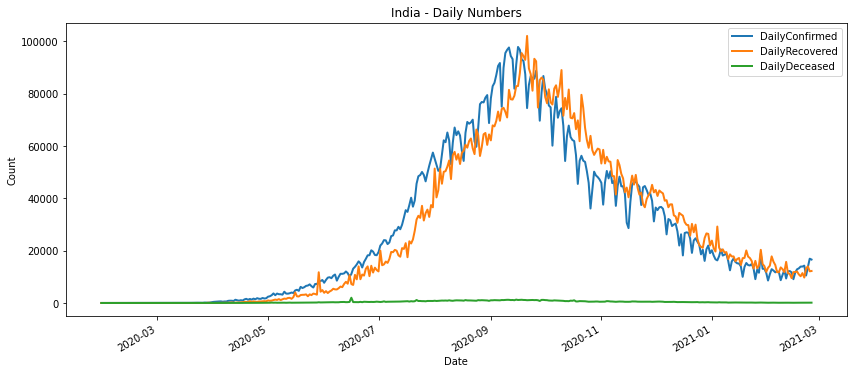

In [51]:
plt.figure(figsize=(14,6))
ind_copy['DailyConfirmed'].plot(ls='-', lw=2, legend=True)
ind_copy['DailyRecovered'].plot(ls='-', lw=2, legend=True)
ind_copy['DailyDeceased'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('India - Daily Numbers');

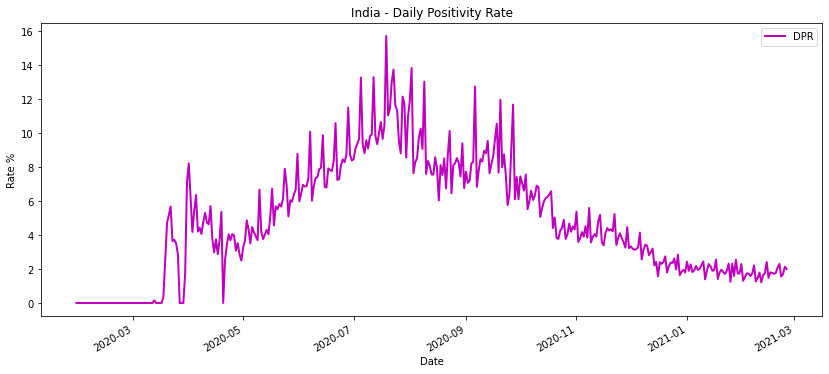

In [52]:
plt.figure(figsize=(14,6))
ind_copy['DPR'].plot(ls='-', lw=2, c='m', legend=True)

plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('India - Daily Positivity Rate');

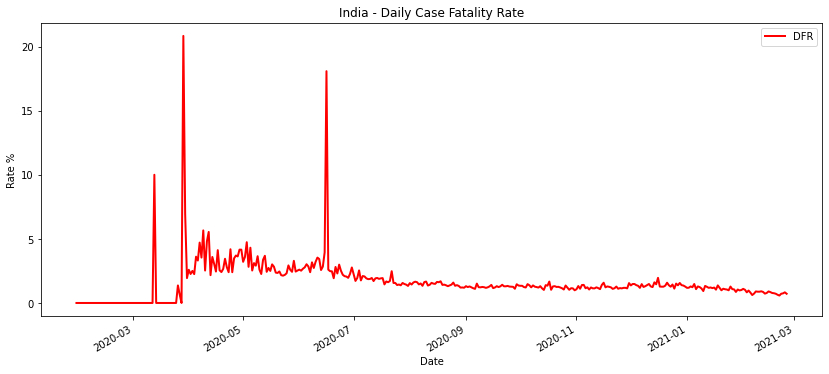

In [53]:
plt.figure(figsize=(14,6))
ind_copy['DFR'].plot(ls='-', lw=2, c='r', legend=True)

plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('India - Daily Case Fatality Rate');

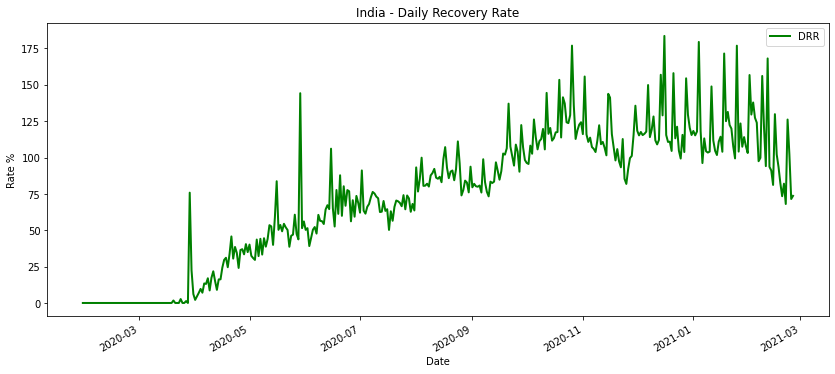

In [54]:
plt.figure(figsize=(14,6))

ind_copy['DRR'].plot(ls='-', lw=2, c='g', legend=True)

plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('India - Daily Recovery Rate');

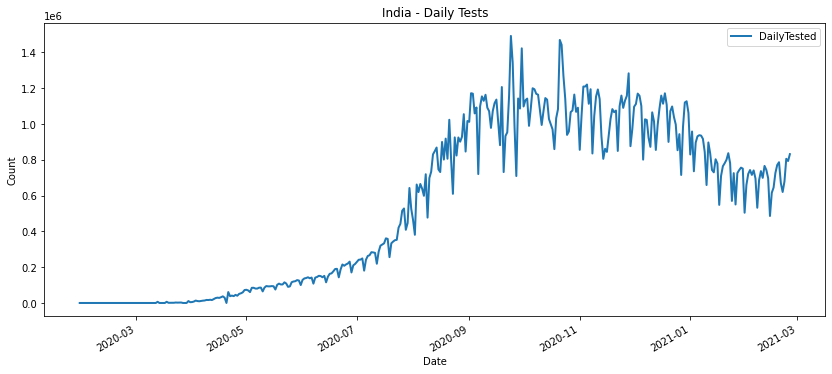

In [55]:
plt.figure(figsize=(14,6))

ind_copy['DailyTested'].plot(ls='-', lw=2, legend=True)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('India - Daily Tests');

In [56]:
ind_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2020-01-30 to 2021-02-25
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          365 non-null    object 
 1   Active          365 non-null    int64  
 2   DailyConfirmed  365 non-null    float64
 3   DailyRecovered  365 non-null    float64
 4   DailyDeceased   365 non-null    float64
 5   DailyTested     365 non-null    float64
 6   DRR             365 non-null    float64
 7   DPR             365 non-null    float64
 8   DFR             365 non-null    float64
 9   Month           365 non-null    int64  
 10  Weekday         365 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 34.2+ KB


In [57]:
# Create a correlation DataFrame
corr_df = ind_copy.drop(['DRR', 'DPR', 'DFR', 'Month', 'Weekday'], axis = 1)
corr_df.head()

,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested
Date,,,,,,
2020-01-30,India,1,0.0,0.0,0.0,0.0
2020-02-02,India,2,1.0,0.0,0.0,0.0
2020-02-03,India,3,1.0,0.0,0.0,0.0
2020-02-14,India,0,0.0,3.0,0.0,0.0
2020-03-02,India,2,2.0,0.0,0.0,0.0


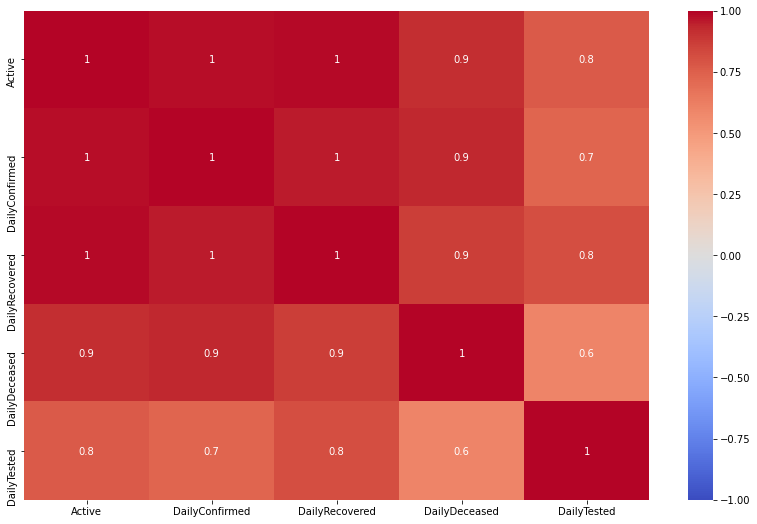

In [58]:
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr_df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm',
           linewidths=0, linecolor='white', ax=ax);

In [59]:
corr_df.describe()

,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested
count,3.650000e+02,365.000000,365.000000,365.000000,3.650000e+02
mean,3.442614e+05,30309.791781,29448.706849,429.756164,5.881136e+05
std,3.062323e+05,27883.560934,27766.960000,371.608943,4.393239e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,8.587300e+04,7254.000000,3789.000000,104.000000,1.155190e+05
50%,2.444380e+05,19430.000000,19508.000000,354.000000,6.991850e+05
75%,5.674170e+05,49631.000000,52135.000000,686.000000,9.948510e+05
max,1.017705e+06,97860.000000,102075.000000,2004.000000,1.492409e+06


### Linear Regression Test - Delete Later

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regr = LinearRegression()

In [62]:
y = corr_df['DailyConfirmed']
x = corr_df[['DailyTested']]

In [63]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
regr.coef_

array([0.04613966])

In [65]:
regr.intercept_

3174.4312657095616

In [66]:
corr_df.shape

(365, 6)

In [67]:
from sklearn.model_selection import train_test_split as tts

In [68]:
df = corr_df.copy()
df = df.reset_index()

In [69]:
df.head()

,Date,Region,Active,DailyConfirmed,DailyRecovered,DailyDeceased,DailyTested
0,2020-01-30,India,1,0.0,0.0,0.0,0.0
1,2020-02-02,India,2,1.0,0.0,0.0,0.0
2,2020-02-03,India,3,1.0,0.0,0.0,0.0
3,2020-02-14,India,0,0.0,3.0,0.0,0.0
4,2020-03-02,India,2,2.0,0.0,0.0,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            365 non-null    datetime64[ns]
 1   Region          365 non-null    object        
 2   Active          365 non-null    int64         
 3   DailyConfirmed  365 non-null    float64       
 4   DailyRecovered  365 non-null    float64       
 5   DailyDeceased   365 non-null    float64       
 6   DailyTested     365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 20.1+ KB


In [71]:
X = df.drop(['DailyConfirmed', 'Date', 'Region'], axis = 1)
y = df['DailyConfirmed']

In [72]:
X

,Active,DailyRecovered,DailyDeceased,DailyTested
0,1,0.0,0.0,0.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,0.0
3,0,3.0,0.0,0.0
4,2,0.0,0.0,0.0
...,...,...,...,...
360,147148,9715.0,83.0,620216.0
361,144325,13233.0,76.0,678685.0
362,143930,13969.0,103.0,805844.0
363,148611,12100.0,141.0,793383.0


In [73]:
y

0          0.0
1          1.0
2          1.0
3          0.0
4          2.0
        ...   
360    14278.0
361    10494.0
362    13682.0
363    16930.0
364    16599.0
Name: DailyConfirmed, Length: 365, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [75]:
X_train

,Active,DailyRecovered,DailyDeceased,DailyTested
211,961247,93331.0,1093.0,1341535.0
340,160717,13443.0,94.0,659422.0
202,1009885,82924.0,1140.0,1136613.0
75,47458,1905.0,120.0,94671.0
84,66080,3131.0,148.0,103514.0
...,...,...,...,...
71,39814,1111.0,97.0,85425.0
106,146444,7263.0,388.0,143737.0
270,437776,42195.0,481.0,1099545.0
348,138811,12928.0,94.0,736903.0


In [76]:
y_train

211    85717.0
340     8579.0
202    97860.0
75      3562.0
84      6023.0
        ...   
71      3339.0
106    11306.0
270    37441.0
348    10731.0
102     8536.0
Name: DailyConfirmed, Length: 292, dtype: float64

In [77]:
regr2 = LinearRegression()

In [78]:
regr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
regr2.coef_

array([ 9.15771351e-02, -1.76771906e-01,  1.22917901e+01,  1.38177228e-04])

In [80]:
regr2.intercept_

-1386.5221338346491

In [81]:
preds = regr2.predict(X_test)
preds

array([80380.89439623, -1185.0321234 , -1365.36498096, 20086.26453614,
         922.18322167, 68589.25922732,  4458.24356869, 18514.12086408,
       48470.05444637, 20726.40170905, 13018.81493982,  -810.91341353,
       23715.00218703,   485.92969014, 30695.89138757, 23145.90161248,
       -1386.4305567 , 38885.38523475, 14586.66996392, 12495.11597876,
       -1383.68324265, 59821.947961  ,  3597.92541578, 43497.30585911,
       46839.59703942, 84296.47919433, 81921.08913778, 27755.26113368,
       10745.85951044, 10519.08012914, -1341.38441751, 15394.84832015,
        -294.20930816, 10178.92063742, 87489.46527433, 15545.21833931,
        1691.38356187, -1363.81795642, 10834.28170349, 14428.6476753 ,
       50829.92579239, 10937.03770177, -1294.48711303, 25956.28883548,
       15611.90633221, 64893.82293136,  8194.12630241,   581.92047368,
       -1386.24740243,  -174.77054853, 70312.87520283, 11044.57943898,
       32844.39970214, 38905.98840158, 63104.15685748, 13091.2055258 ,
      

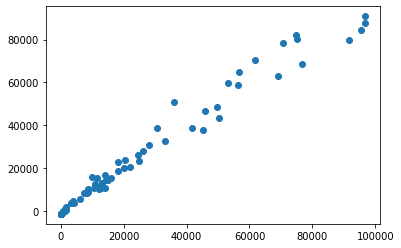

In [82]:
plt.scatter(y_test, preds)

<AxesSubplot:xlabel='DailyConfirmed', ylabel='Density'>

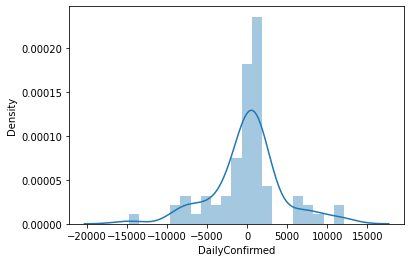

In [83]:
sns.distplot((y_test - preds))